## Step Presentation 1
### Credit Card Fraud Detection
by 
1. Basant Singh-500209042


***
#### 1. EDA

- importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
import scipy as sp
from matplotlib.pyplot import figure


- reading the data

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


- name of columns

In [4]:
print(df.columns.to_numpy())

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [5]:
df.shape

(284807, 31)

- Checking for null values & duplicates

In [6]:
df.isnull().any().sum()

0

- Checking for Distribution of classes

Text(0.5, 1.0, 'only 492 out of 284315 are fraud')

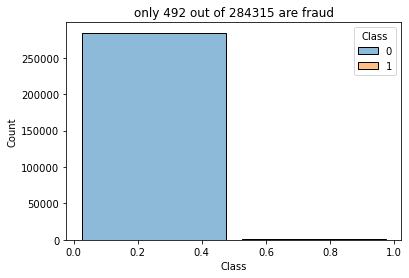

In [7]:
sns.histplot(data=df, x="Class",bins=2,hue="Class",shrink=0.9).set_title("only "+str(df['Class'].value_counts()[1])+" out of "+str(df['Class'].value_counts()[0])+" are fraud")



In [8]:
print("only ",(df['Class'].value_counts()[1]/df['Class'].value_counts()[0])*100,"%")

only  0.17304750013189596 %


<div class="alert alert-block alert-danger">
    Important Observation
    <p>
        1. very very highly imbalanced dataset.
        <br>
        2. Only 0.17304750013189596 % are fraud
    </p>
  
</div>



***
#### 2.Univariate Analysis

- Fraud amounts Analysis

In [9]:
fraud=df[df['Class']==1]
not_fraud=df[df['Class']==0]

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

75% of frauds are less than 105.89


Text(0.5, 1.0, 'Box plot of Fraud Transactions Amount')

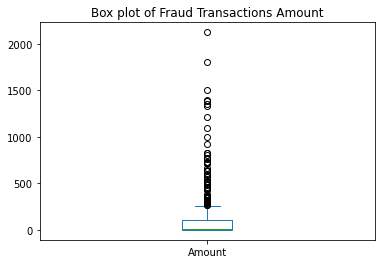

In [10]:
print(fraud['Amount'].describe())
print()
print("{}% of frauds are less than".format(75),np.percentile(fraud['Amount'],75))
fraud["Amount"].plot.box()
plt.title("Box plot of Fraud Transactions Amount")

- Non_fraud amounts Analysis

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

75% of genuine transactions are less than 77.05


Text(0.5, 1.0, 'Box plot of Non_Fraud Transactions Amount')

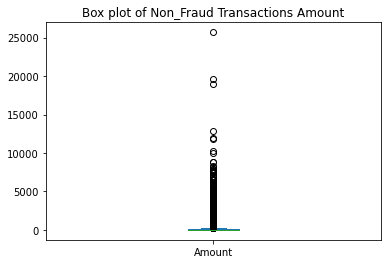

In [11]:
print(not_fraud['Amount'].describe())
print()
print("{}% of genuine transactions are less than".format(75),np.percentile(not_fraud['Amount'],75))
not_fraud["Amount"].plot.box()

plt.title("Box plot of Non_Fraud Transactions Amount")

- IQR(Inter Quaratile Range) of different classes

In [12]:
print("IQR(class==1) => ",np.percentile(fraud["Amount"],75)-np.percentile(fraud["Amount"],50))
print("IQR(class==0) => ",np.percentile(not_fraud["Amount"],75)-np.percentile(not_fraud["Amount"],50))

IQR(class==1) =>  96.64
IQR(class==0) =>  55.05


<div class="alert alert-block alert-danger">
 Important Observations.
    <p> 1.75% of genuine transactions are less than 77.05
        <br>
        2. 75% of frauds are less than 105.89
        <br>
        3. only 492 out of 284315 are fraud
        <br>
    </p>

</div>



***
#### 3. Bivariate Analysis

In [13]:
df["Size"]=[1 if x==0 else 3 for x in df["Class"]]

Text(0.5, 1.0, 'Transactions done over time')

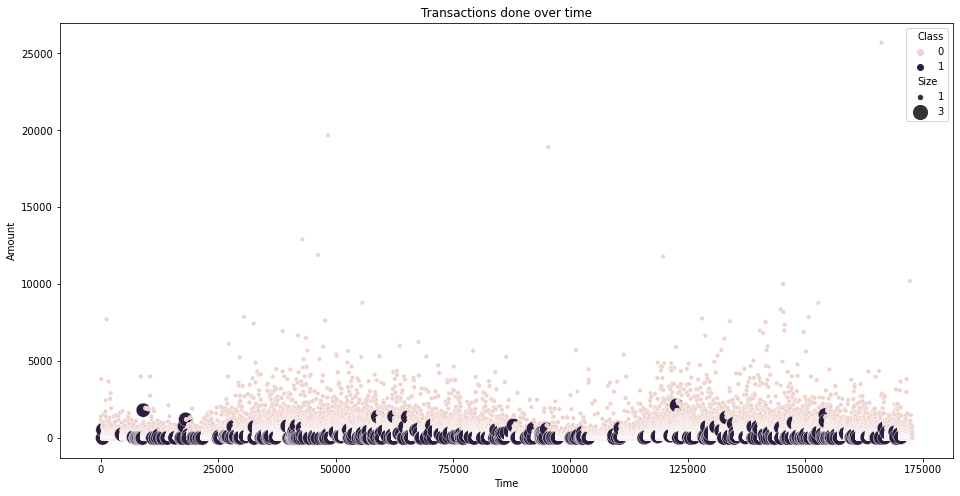

In [14]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x=df["Time"],y=df["Amount"],hue=df["Class"],legend="full",size=df["Size"],hue_norm=(0, 1),sizes=(20,200)).set_title("Transactions done over time")


<div class="alert alert-block alert-danger">
 Important Observations.
    <p> 1. It is clear from graph that most transactions are genuine.
        <br>
        2. As maximum fraud tranaction is of €2125
        <br>
    </p>

</div>

- Checking for trimmed mean, Basically trimmed mean is mean without outliers(i.e- top x % percentile)

In [15]:
tr_mean_of_amt_0=stats.trim_mean(df[df['Class']==0]["Amount"], 0.1)
tr_mean_of_amt_1=stats.trim_mean(df[df['Class']==1]["Amount"], 0.1)

In [16]:
print("trimmed mean of 0 class =>",tr_mean_of_amt_0)
print("trimmed mean of 1 class =>",tr_mean_of_amt_1)

trimmed mean of 0 class => 41.62320307931748
trimmed mean of 1 class => 58.82510152284264


<div class="alert alert-block alert-danger">
 Important Observation.
    <p> 1. It is evient from trimmed mean that fraud transaction is not of high amount.
    </p>
</div>


- Now Analysing PCA features relation with amount.

Text(0.5, 0.98, 'Paiplot of top 3 PCA features colour encoded with Class')

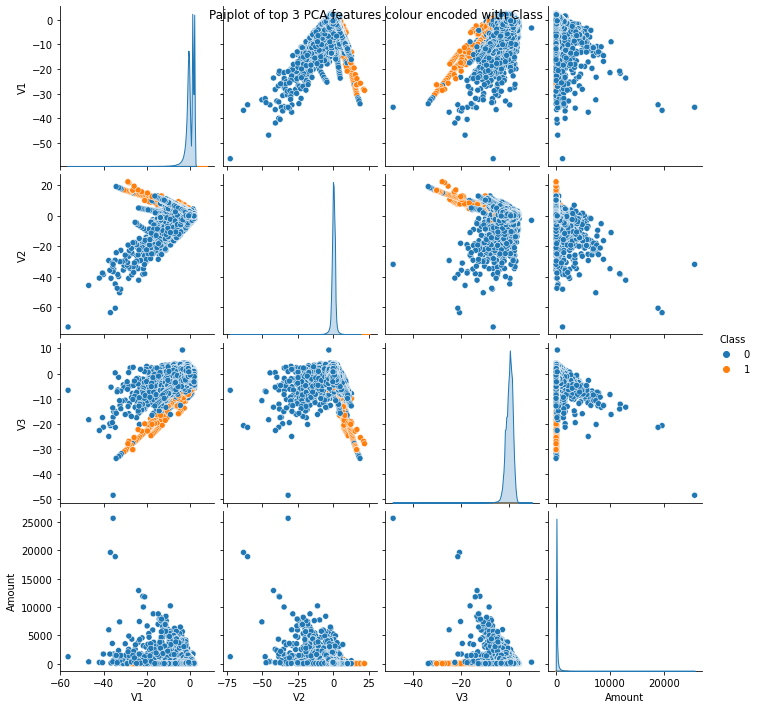

In [17]:
sns.pairplot(df[["V1","V2","V3","Amount","Class"]],hue='Class').fig.suptitle("Paiplot of top 3 PCA features colour encoded with Class")

- Now analysing Correlation between variables

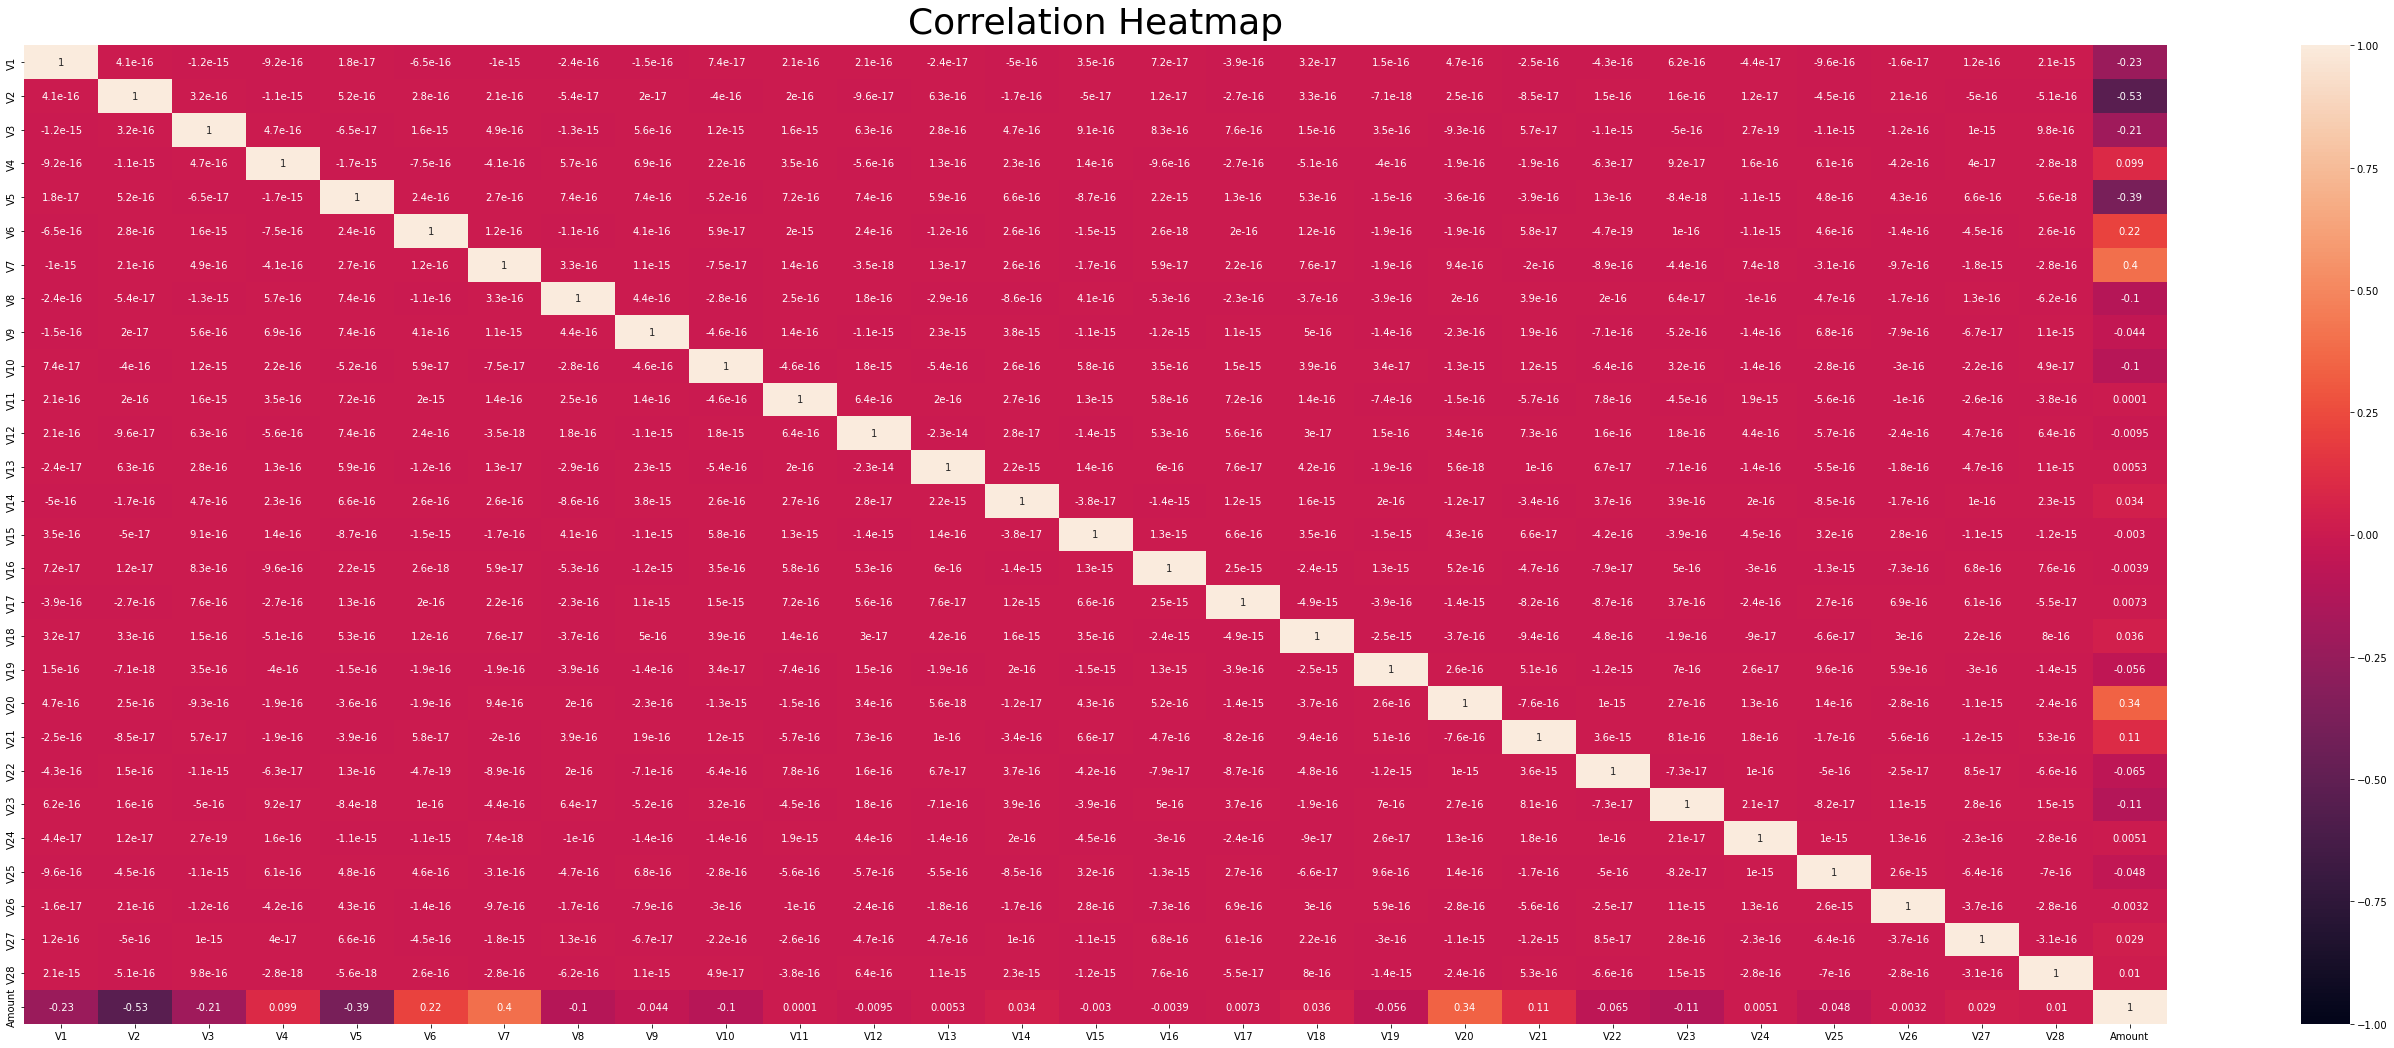

In [18]:
plt.figure(figsize=(48, 18))
#Dropping Time & Class(binary) from the heatmap
heatmap = sns.heatmap(df.drop(["Time","Class","Size"],axis=1).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':36}, pad=12);

<div class="alert alert-block alert-danger">
 Important Observation.
    <p> 1. From the heatmap its evident that there is somewhat correlation between Amount & Principal components features
    </p>

</div>


- Now analysing Covariance between variables

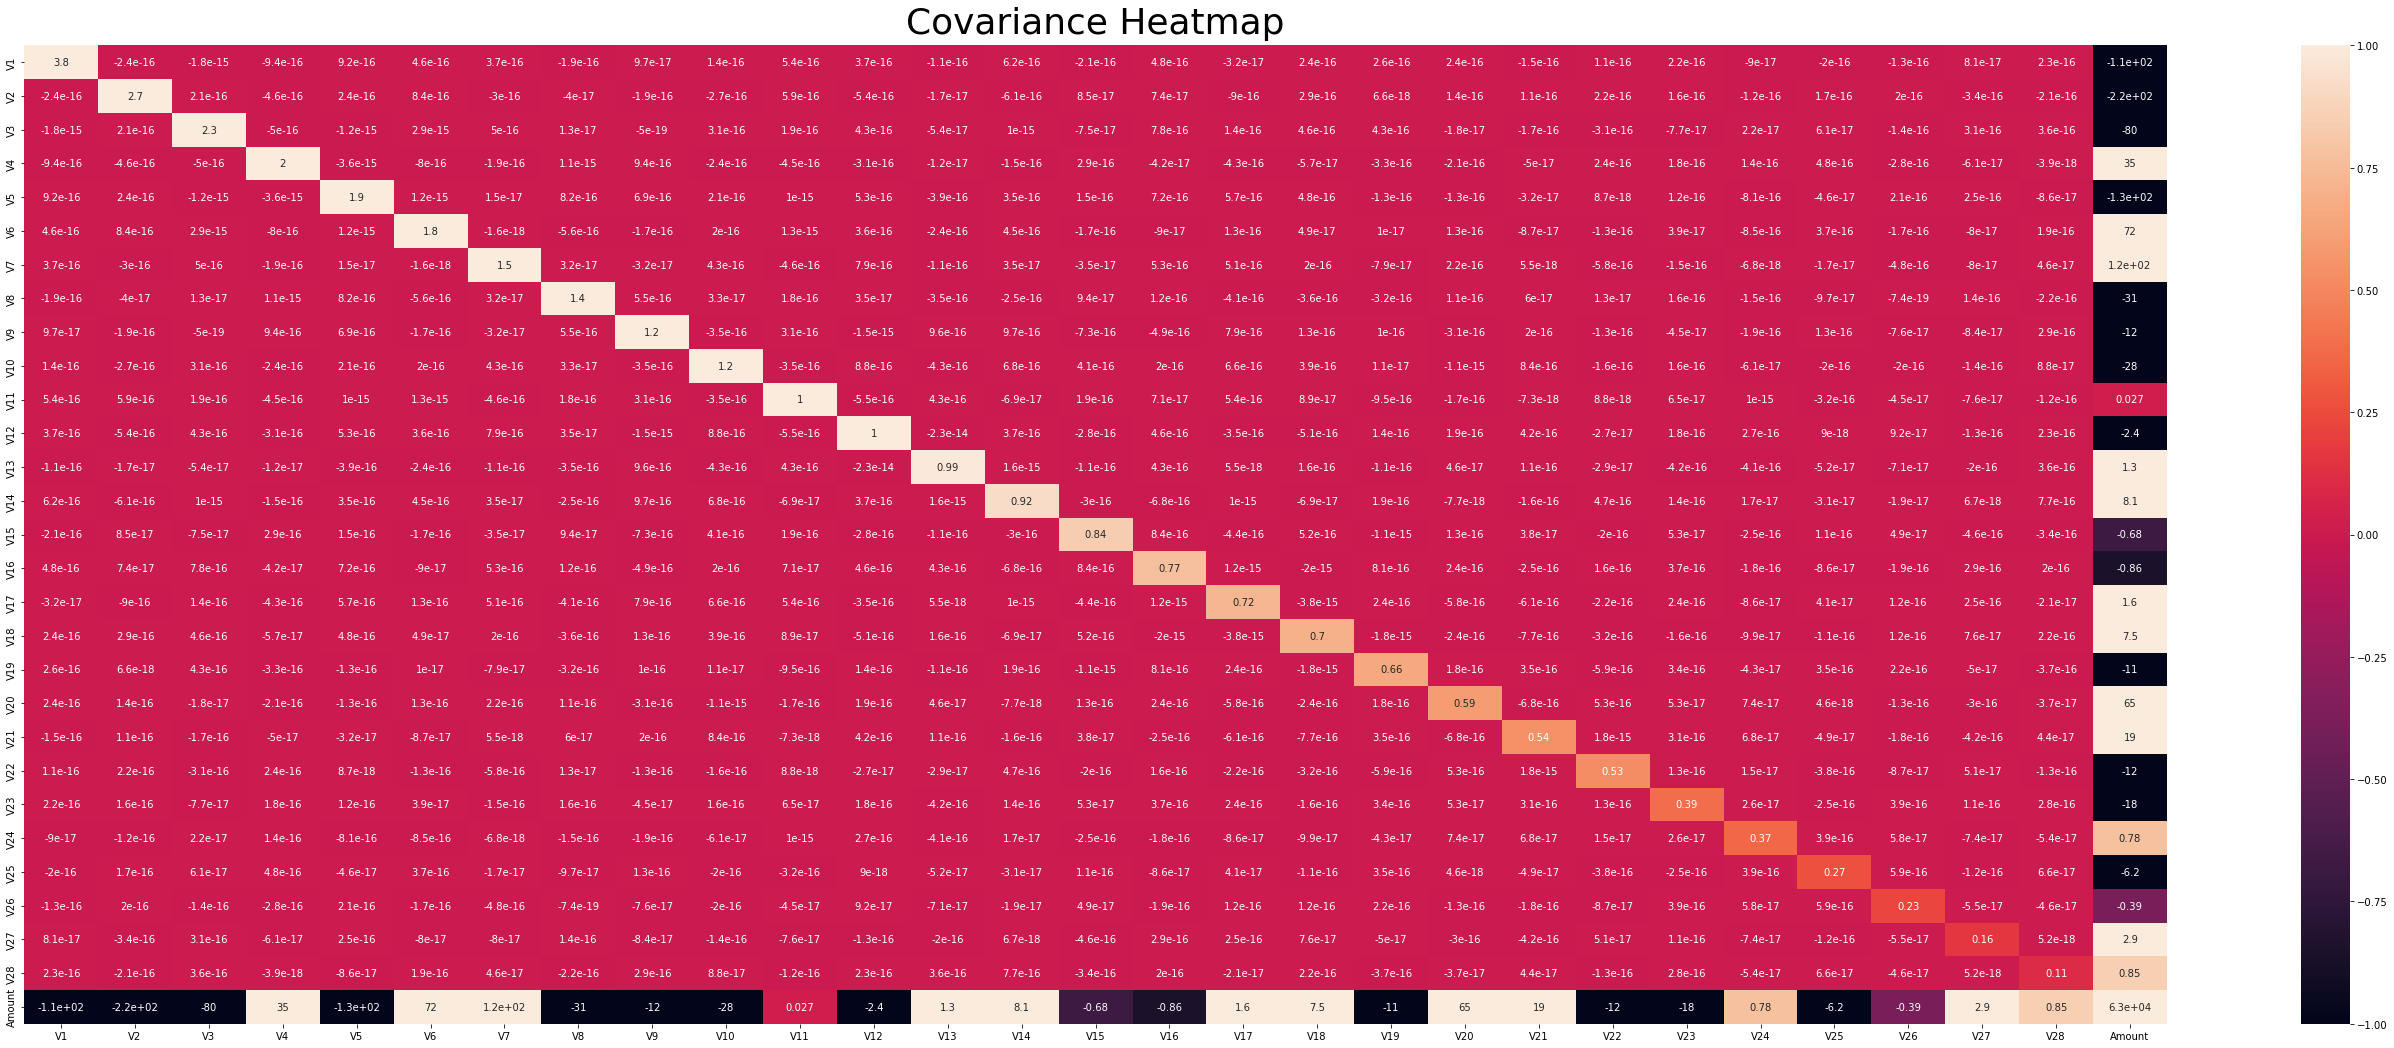

In [19]:
plt.figure(figsize=(48, 18))
#Dropping Time & Class(binary) from the heatmap
heatmap = sns.heatmap(df.drop(["Time","Class","Size"],axis=1).cov(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':36}, pad=12);

- checking frequency of event


In [20]:
df[df['Class']==1][['Time','Amount']]

,Time,Amount
541,406.0,0.00
623,472.0,529.00
4920,4462.0,239.93
6108,6986.0,59.00
6329,7519.0,1.00
...,...,...
279863,169142.0,390.00
280143,169347.0,0.76
280149,169351.0,77.89
281144,169966.0,245.00


[]

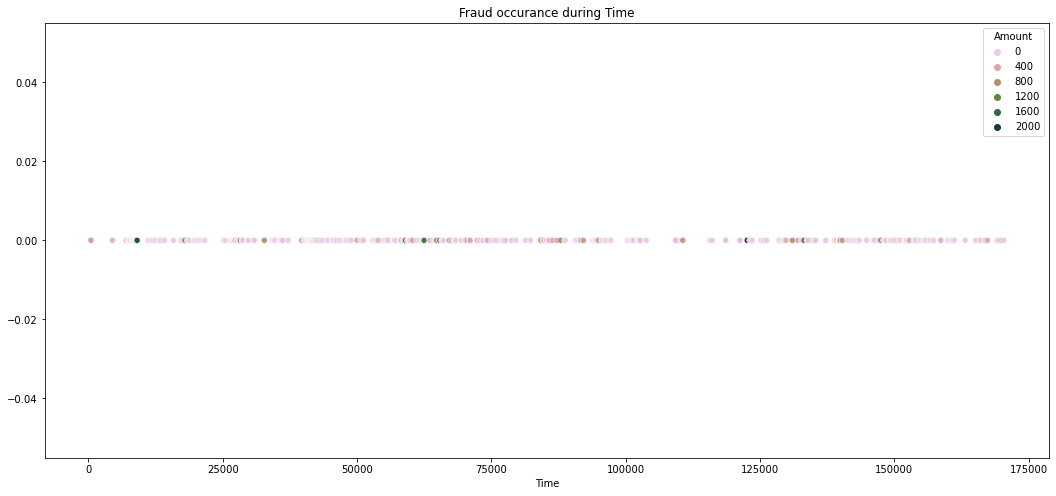

In [21]:
plt.figure(figsize=(18, 8))
plt.title("Fraud occurance during Time")
dummy=df[df['Class']==1][['Time',"Amount"]]
sns.scatterplot(x=dummy['Time'], y=np.zeros_like(dummy['Time']),hue=dummy["Amount"],vmin=-1,vmax=1,palette="ch:r=1,rot=-1")
plt.plot()


<div class="alert alert-block alert-danger">
 Important Observations.
    <p> 1. Frauds are randomly occuring event as observed from the graph so we can drop time feature
        <br>
        2. Time is not very informative feature.
    </p>

</div>

 

***
#### 4. Preprocessing & Upsampling using smothe

In [22]:
#Time seems to be not very relevant lets drop it
X=df.drop(["Class","Time","Size"],axis=1)
y=df.Class

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=22)
 

In [24]:
def return_per(x):
    zer,on=(0,0)
    for i in x:
        if i==0:
            zer+=1;
        elif i==1:
            on+=1
    return str(on/(zer+on))+" % are postive class"        

In [25]:
print(return_per(y_train)+"  in train_data set")

0.0017508953442101074 % are postive class  in train_data set


In [26]:
print(return_per(y_test)+" in test_data set")

0.0016572568186286902 % are postive class in test_data set


- **Separtely doing min max scaling of the train & test data to prevnet data leakage probelem**
- **There is no requirement of standarzing the PCA based features**

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(np.array(X_train['Amount']).reshape(-1,1))
X_train["Amount"]=scaler.transform(np.array(X_train['Amount']).reshape(-1,1))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(np.array(X_test['Amount']).reshape(-1,1))
X_test["Amount"]=scaler.transform(np.array(X_test['Amount']).reshape(-1,1))

[Text(0.5, 1.0, 'After min max X_test')]

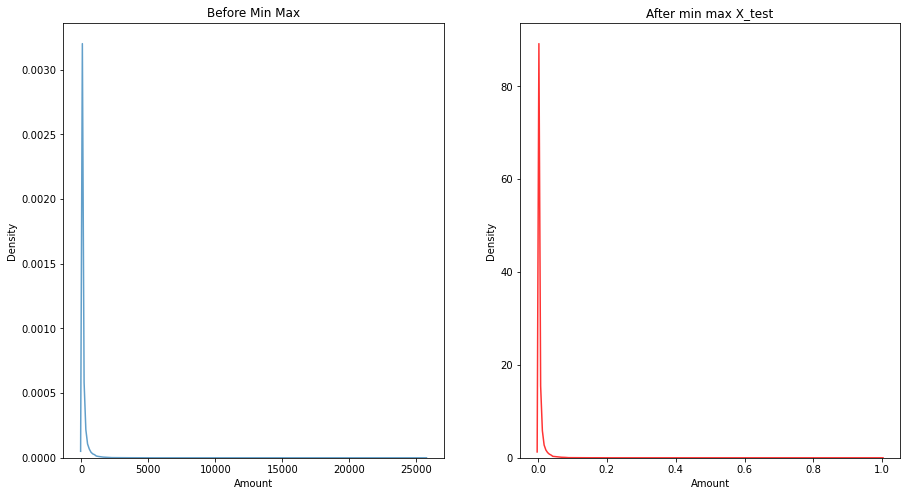

In [29]:

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1) 
sns.kdeplot(data=df["Amount"],alpha=0.7).set(title='Before Min Max') 
plt.subplot(1,2,2) 

sns.kdeplot(data=X_train["Amount"],color="red",alpha=0.8).set(title='After min max X_test')

<div class="alert alert-block alert-danger">
 Important Observation.
    <p> 1. Min Max Scaling reduces the range of feature from 0 to 1.         
    </p>

</div>

 

- Using smothe for for upsampling. Smothe algorithm uses KNN to generate synthentic points to do 50-50% balancing.

In [30]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

In [31]:
X_train_bal, y_train_bal = oversample.fit_resample(X_train, y_train)


In [32]:
X_train_bal.shape

(426462, 29)

Text(0.5, 1.0, 'After Smothe the classes are balanced')

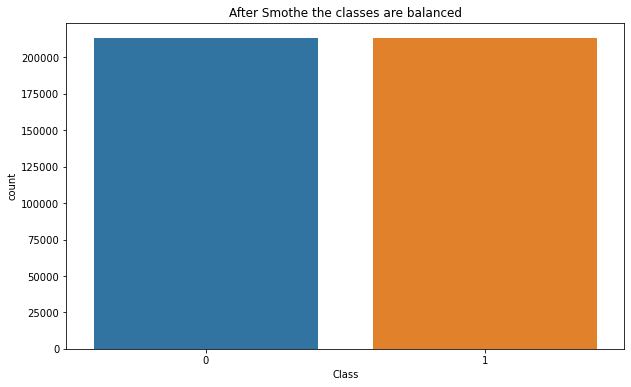

In [33]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Class', data=y_train_bal.to_frame()).set_title("After Smothe the classes are balanced")


In [34]:
new_df=X_train
new_df["Class"]=y_train

In [35]:
new_df_2=X_train_bal
new_df_2["Class"]=y_train_bal

- Visulisation of before & after smothe.

Text(0.5, 1.0, 'After Smothe Upsampling')

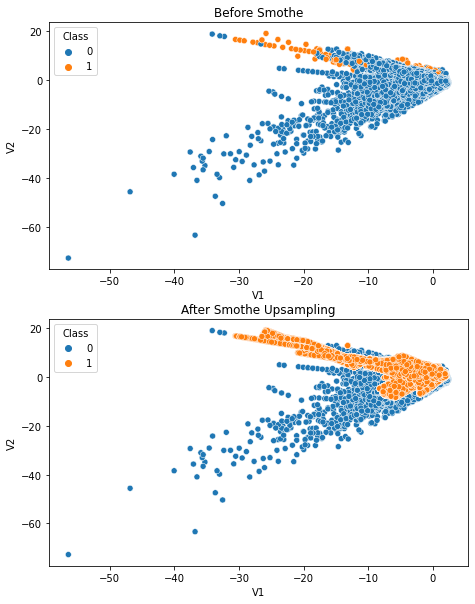

In [36]:
plt.figure(figsize=(7.5,10))
plt.subplot(2, 1, 1)
sns.scatterplot(data=new_df, x="V1", y="V2", hue="Class").set_title("Before Smothe")
plt.subplot(2, 1, 2)
sns.scatterplot(data=new_df_2,x="V1", y="V2", hue="Class").set_title("After Smothe Upsampling")


***
#### 4. Modelling 

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_bal.drop("Class",axis=1), y_train_bal)

In [38]:
y_pred=clf.predict(X_test)

- Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[69402,  1682],
       [   10,   108]])

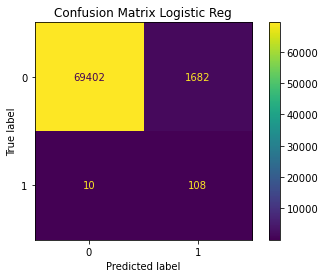

In [40]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(clf, X_test, y_test) 
plt.title("Confusion Matrix Logistic Reg")
plt.show()


- **ROC Curve**

Text(0.5, 1.0, 'ROC Curve')

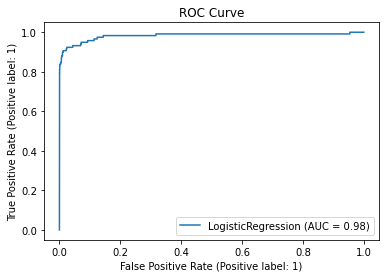

In [41]:
from sklearn import metrics, model_selection
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.title("ROC Curve")

<div class="alert alert-block alert-danger">
    Conclusion
    <p> - ROC Score of 0.98 was obtained after upsampling using smothe & logistic regression
    </p>

</div>

 

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9762366225667818

In [47]:
from sklearn.metrics import classification_report
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71084
           1       0.06      0.92      0.11       118

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202

